### Support Vecotr Classifier

In [25]:
import pandas as pd
import numpy as np

In [26]:
from sklearn.datasets import make_classification

In [27]:
X,y=make_classification(n_samples=1000,n_classes=2,n_clusters_per_class=2,n_features=2,n_redundant=0,random_state=2)

In [28]:
X

array([[-0.57863415, -0.69449349],
       [ 1.38412823,  1.20624665],
       [-1.80988506, -1.57067334],
       ...,
       [-0.52009246, -0.49495467],
       [-1.22819597,  1.05389834],
       [-0.66413657,  1.37065996]])

In [29]:
y

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [30]:
import seaborn as sns

<AxesSubplot: xlabel='0', ylabel='1'>

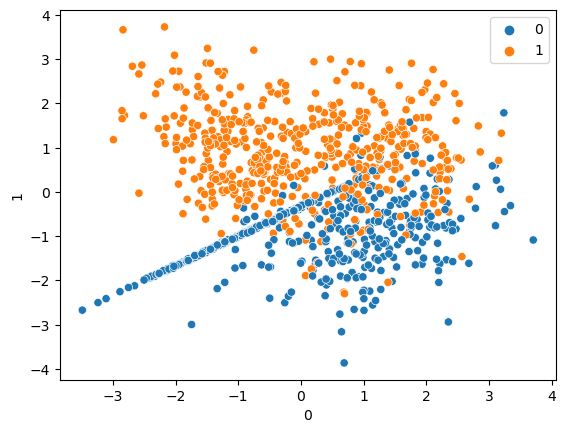

In [31]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
from sklearn.svm import SVC

In [35]:
svc=SVC(kernel='linear')

In [36]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [37]:
y_predict=svc.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.884
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       125
           1       0.88      0.90      0.89       125

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[109  16]
 [ 13 112]]


### Hyper parameter tunning

In [40]:
parameter={
    'gamma':[1,0.1,0.001,0.001,0.0001],
    'C': [0.1,1,10,1000,1000]
}

In [41]:
svcs=SVC()

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
serachcv=GridSearchCV(svcs,param_grid=parameter,refit=True)

In [44]:
serachcv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 1000, 1000],
                         'gamma': [1, 0.1, 0.001, 0.001, 0.0001]})

In [45]:
serachcv.best_params_

{'C': 10, 'gamma': 0.1}

In [49]:
y_predicts=serachcv.predict(X_test)

In [50]:
print(accuracy_score(y_predicts,y_test))
print(classification_report(y_predicts,y_test))
print(confusion_matrix(y_predicts,y_test))

0.88
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       133
           1       0.85      0.91      0.88       117

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[114  19]
 [ 11 106]]
